### Documentación prueba en modelos de regresión lineal

Fuente de datos utilizados: https://www.kaggle.com/budincsevity/szeged-weather


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Primera vista de datos

In [159]:
df = pd.read_csv('weatherHistory.csv')
df.head(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


#### Separo las columnas que me interesan

In [163]:
frame = df[["Temperature (C)", "Apparent Temperature (C)", 'Humidity',
           "Wind Speed (km/h)", "Wind Bearing (degrees)", "Visibility (km)",
           "Pressure (millibars)"]]

In [164]:
frame.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


#### Es conveniente que no hayan valores nulos.

In [165]:
frame.isnull().sum()

Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64

#### Graficas generales de mis datos

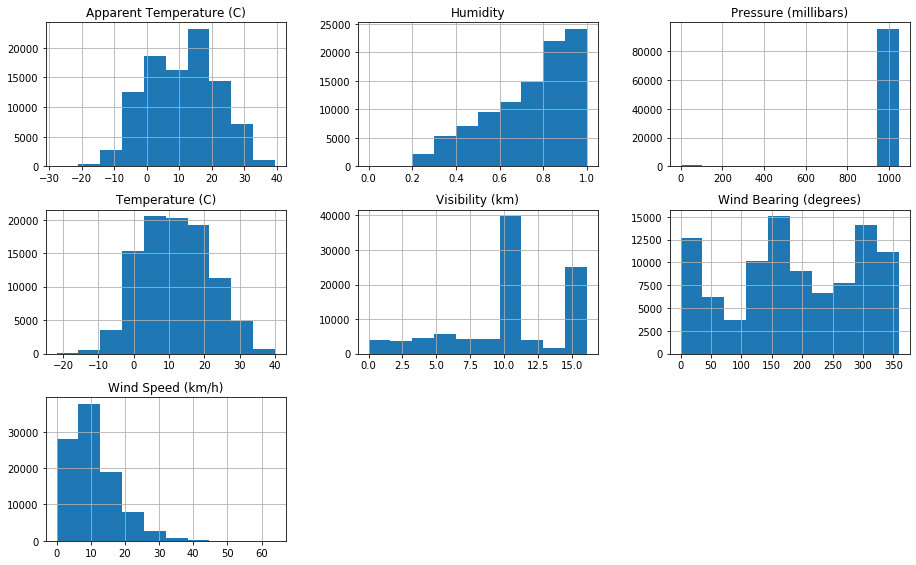

In [166]:
frame.hist()
plt.subplots_adjust(left=3, right=5,top=2, bottom=.2)
plt.show()

#### Buscando mis variables que puedan tener una "relacion lineal"

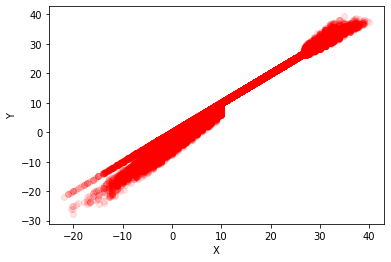

In [169]:
#"Temperature (C)", "Apparent Temperature (C)", 'Humidity',
#           "Wind Speed (km/h)", "Wind Bearing (degrees)", "Visibility (km)",
#           "Pressure (millibars)"

x = frame["Temperature (C)"]
y = frame['Apparent Temperature (C)']

plt.scatter(x,y, color='red', alpha=.1)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Inicio de la sección para creación del modelo.

In [170]:
from sklearn.model_selection import train_test_split

#### divido mi dataset en 75% de entrenamiento 25% en test ( porcentaje por defecto)

In [172]:
train, test = train_test_split(frame, random_state=0)

In [173]:
train.shape

(72339, 7)

In [174]:
test.shape

(24114, 7)

#### Grafico para verificar que mi set de entrenamiento cumpla la linealidad

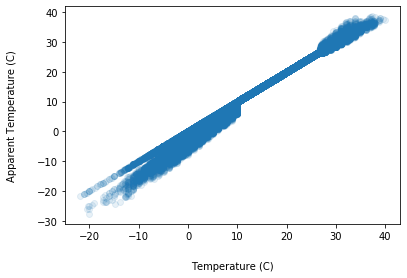

In [175]:
plt.scatter(train['Temperature (C)'], train['Apparent Temperature (C)'], alpha=.1)
plt.xlabel('Temperature (C)', labelpad=20)
plt.ylabel('Apparent Temperature (C)', labelpad=20)
plt.show()

#### Inicio las librerias a usar.

In [176]:
from sklearn import linear_model
from sklearn.metrics import r2_score

#### Inicio mi modelo y preparo los datos que va a resivir.

In [177]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Temperature (C)']])
train_y = np.asanyarray(train[['Apparent Temperature (C)']])

#### Inicia el entrenamiento

In [180]:
# entrenamiento
regr.fit(train_x, train_y)

# Valores calculados por el modelo
coef = regr.coef_
intercept = regr.intercept_

In [181]:
print(coef)
print(intercept)

[[1.11186621]]
[-2.41462812]


#### Reemplazo los valores $m$ y $n$ con los coeficientes calculados por el modelo.
$y = mx + n$


In [182]:
Y = coef*train_x + intercept

#### visualización de datos con la recta calculada por el modelo.

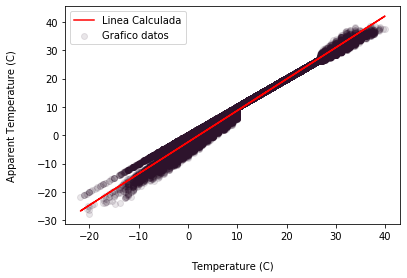

In [183]:
# Grafico de visualizacion de datos usados
plt.scatter(train['Temperature (C)'], train['Apparent Temperature (C)'],
            c=['#2d132c'], alpha=.1, label='Grafico datos')

plt.xlabel('Temperature (C)', labelpad=20)
plt.ylabel('Apparent Temperature (C)', labelpad=20)

# Grafica la recta con los datos existentes(train_x) y los predichos por el modelo (Y)
plt.plot(train_x, Y, color='red', label='Linea Calculada')
plt.legend(loc="upper left")

plt.show()

#### Proceso de predicción con los datos.

In [184]:
test_x = np.asanyarray(test[['Temperature (C)']])

predict = regr.predict(test_x)


# Datos reales para comparar los predicho.
test_y = np.asanyarray(test[['Apparent Temperature (C)']])

#### Calculos del valor y eficiencia del modelo.

In [186]:
# media_error_residual
# valores reales - valores_predichos
media_error_residual = np.mean(np.absolute(test_y - predict))

# Error de cuadrado medio
# Objetivo del modelo es minimizar este valor lo maximo posible
MSE = np.mean((test_y - predict)**2)

# R cuadratica
# 1 es el mejor resultado posible, y puede tomar valores negativos siendo peor modelo.
r2 = r2_score(test_y , predict)

print("Media error residual: ", round(media_error_residual, 3), '\n')
print("Media error cuadratico (MSE): ", round(MSE, 3), '\n')
print("R2-score: ", round(r2, 2))

Media error residual:  0.989 

Media error cuadratico (MSE):  1.669 

R2-score:  0.99


#### Union de columnas para una mejor visualización de los números.

In [187]:
col_concat = np.concatenate((test_x, test_y, predict), axis=1)
dataframe = pd.DataFrame(col_concat, columns=['Temperature (C)', 'Apparent Temperature (C)',
                                             'Prediction'])
dataframe.head(10)

,Temperature (C),Apparent Temperature (C),Prediction
0,14.422222,14.422222,13.620953
1,12.155556,12.155556,11.100723
2,23.961111,23.961111,24.226922
3,15.000000,15.000000,14.263365
4,12.800000,12.800000,11.817259
5,11.088889,11.088889,9.914733
6,0.555556,-2.944444,-1.796925
7,12.733333,12.733333,11.743135
8,27.222222,27.916667,27.852841
9,20.211111,20.211111,20.057423
